In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sens_feat(phi, X):
    rotation_matrix = np.array([[np.cos(phi), -np.sin(phi)], [np.sin(phi), np.cos(phi)]])
    return X @ rotation_matrix

def cos_sim(x,y):
    return np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

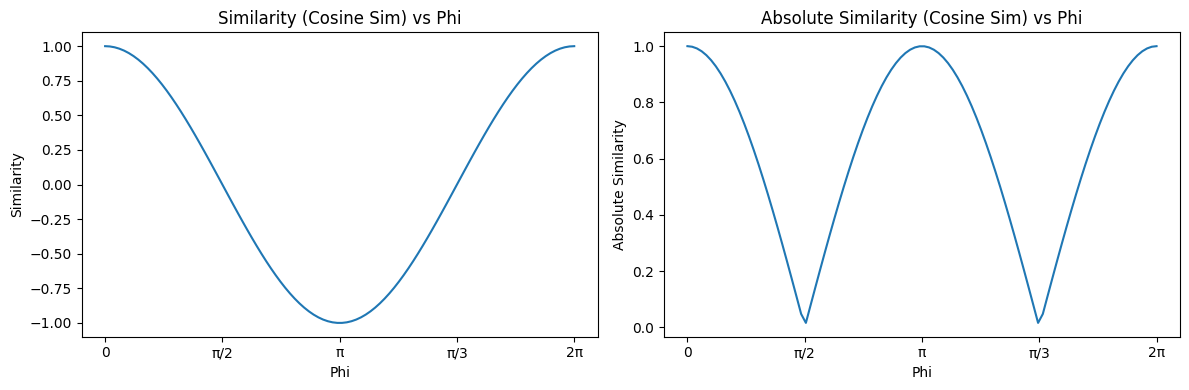

In [3]:
x = np.array([2,3])
phi= np.linspace(0,2*np.pi,100)

similarity = []
abs_similarity = []
phi_values = np.linspace(0, 2*np.pi, 100)
for phi in phi_values:
    S = sens_feat(phi,x)
    similarity += [cos_sim(S,x)]
    abs_similarity += [abs(cos_sim(S,x))]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the similarity vs phi
ax1.plot(phi_values, similarity)
ax1.set_xlabel('Phi')
ax1.set_ylabel('Similarity')
ax1.set_title('Similarity (Cosine Sim) vs Phi')
ax1.set_xticks([0, 1/2*np.pi,np.pi,3/2*np.pi, 2*np.pi])
ax1.set_xticklabels(['0','π/2', 'π', 'π/3','2π'])

# Plot the absolute similarity vs phi
ax2.plot(phi_values, abs_similarity)
ax2.set_xlabel('Phi')
ax2.set_ylabel('Absolute Similarity')
ax2.set_title('Absolute Similarity (Cosine Sim) vs Phi')
ax2.set_xticks([0, 1/2*np.pi,np.pi,3/2*np.pi, 2*np.pi])
ax2.set_xticklabels(['0','π/2', 'π', 'π/3','2π'])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()
